# Importing relevant libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'ticks', color_codes = True)
import warnings
warnings.filterwarnings('ignore')

C:\Users\lenovo\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Importing dataset

In [2]:
price_data = pd.read_csv(r'C:\Users\lenovo\Desktop\My projects\Datasets\Used car price prediction\train-data.csv')

# Descriptive statistics

In [3]:
price_data.describe()

,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,2013.358199,5.873838e+04,5.278735,9.479468
std,3.269742,9.126884e+04,0.808840,11.187917
min,1998.000000,1.710000e+02,0.000000,0.440000
25%,2011.000000,3.400000e+04,5.000000,3.500000
50%,2014.000000,5.300000e+04,5.000000,5.640000
75%,2016.000000,7.300000e+04,5.000000,9.950000
max,2019.000000,6.500000e+06,10.000000,160.000000


In [4]:
for column in price_data.columns:
    if type(price_data[column][0]) == str:
        print('***********************************')
        print(pd.value_counts(price_data[column], dropna = False))
        print('***********************************', '\n')

***********************************
Mahindra XUV500 W8 2WD             49
Maruti Swift VDI                   45
Maruti Swift Dzire VDI             34
Honda City 1.5 S MT                34
Maruti Swift VDI BSIV              31
                                   ..
Skoda Rapid 1.6 MPI Active          1
Nissan Evalia 2013 XL               1
Ford Figo Aspire 1.5 TDCi Trend     1
Ford EcoSport 1.5 Petrol Trend      1
Fiat Punto 1.3 Emotion              1
Name: Name, Length: 1876, dtype: int64
*********************************** 

***********************************
Mumbai        790
Hyderabad     742
Kochi         651
Coimbatore    636
Pune          622
Delhi         554
Kolkata       535
Chennai       494
Jaipur        413
Bangalore     358
Ahmedabad     224
Name: Location, dtype: int64
*********************************** 

***********************************
Diesel      3205
Petrol      2746
CNG           56
LPG           10
Electric       2
Name: Fuel_Type, dtype: int64
*****************

In [5]:
for column in price_data.columns:
    print(column, ': ', type(price_data[column][0]))

Name :  <class 'str'>
Location :  <class 'str'>
Year :  <class 'numpy.int64'>
Kilometers_Driven :  <class 'numpy.int64'>
Fuel_Type :  <class 'str'>
Transmission :  <class 'str'>
Owner_Type :  <class 'str'>
Mileage :  <class 'str'>
Engine :  <class 'str'>
Power :  <class 'str'>
Seats :  <class 'numpy.float64'>
New_Price :  <class 'float'>
Price :  <class 'numpy.float64'>


# Data Mining

In [6]:
print(price_data.shape)
print(price_data.isnull().sum())

(6019, 13)
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64


In [7]:
price_data.drop(['New_Price'], axis = 1, inplace = True)
print(price_data.shape)
price_data.dropna(inplace = True)
print(price_data.shape)

(6019, 12)
(5975, 12)


In [8]:
price_data['Power'] = [element.split(' ', 1)[0] for element in price_data['Power']]
price_data['Power'] = price_data['Power'].replace('null', np.NaN)
price_data['Mileage'] = [element.split(' ', 1)[0] for element in price_data['Mileage']]
price_data['Engine'] = [element.split(' ', 1)[0] for element in price_data['Engine']]
price_data['Model'] = [element.split(' ', 2)[0] for element in price_data['Name']]
price_data.drop(['Name'], axis = 1, inplace = True)
price_data['Price'] = price_data['Price'] * 100000
price_data = price_data.reset_index(drop = True)

In [9]:
price_data['Years_old'] = 2020 - price_data['Year']
price_data.drop(['Year'], axis = 1, inplace = True)

In [10]:
print(price_data.shape)
print(price_data.isnull().sum())

(5975, 12)
Location               0
Kilometers_Driven      0
Fuel_Type              0
Transmission           0
Owner_Type             0
Mileage                0
Engine                 0
Power                103
Seats                  0
Price                  0
Model                  0
Years_old              0
dtype: int64


In [11]:
print(price_data.shape)
price_data.dropna(inplace = True)
print(price_data.shape)

(5975, 12)
(5872, 12)


In [12]:
price_data['Power'] = price_data['Power'].astype(float)
price_data['Mileage'] = price_data['Mileage'].astype(float)
price_data['Engine'] = price_data['Engine'].astype(float)

In [13]:
price_data.describe()

,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Years_old
count,5.872000e+03,5872.000000,5872.000000,5872.000000,5872.000000,5.872000e+03,5872.000000
mean,5.831700e+04,18.277839,1625.745572,113.276894,5.283719,9.603919e+05,6.522309
std,9.216941e+04,4.365657,601.641783,53.881892,0.805081,1.124945e+06,3.164568
min,1.710000e+02,0.000000,624.000000,34.200000,2.000000,4.400000e+04,1.000000
25%,3.342250e+04,15.260000,1198.000000,75.000000,5.000000,3.517500e+05,4.000000
50%,5.260900e+04,18.200000,1495.500000,97.700000,5.000000,5.750000e+05,6.000000
75%,7.240275e+04,21.100000,1991.000000,138.100000,5.000000,1.000000e+06,8.000000
max,6.500000e+06,33.540000,5998.000000,560.000000,10.000000,1.600000e+07,22.000000


In [14]:
for column in price_data.columns:
    if type(price_data[column][0]) == str:
        print('***********************************')
        print(pd.value_counts(price_data[column], dropna = False))
        print('***********************************', '\n')

***********************************
Mumbai        775
Hyderabad     718
Kochi         645
Coimbatore    629
Pune          594
Delhi         545
Kolkata       521
Chennai       476
Jaipur        402
Bangalore     347
Ahmedabad     220
Name: Location, dtype: int64
*********************************** 

***********************************
Diesel    3152
Petrol    2655
CNG         55
LPG         10
Name: Fuel_Type, dtype: int64
*********************************** 

***********************************
Manual       4170
Automatic    1702
Name: Transmission, dtype: int64
*********************************** 

***********************************
First             4839
Second             925
Third              101
Fourth & Above       7
Name: Owner_Type, dtype: int64
*********************************** 

***********************************
Maruti           1175
Hyundai          1058
Honda             600
Toyota            394
Mercedes-Benz     316
Volkswagen        314
Ford              294
Mahin

In [15]:
price_data['Model'] = price_data['Model'].replace('Isuzu', 'ISUZU')

In [16]:
price_data = price_data[['Model', 'Location', 'Years_old', 'Kilometers_Driven', 'Fuel_Type', 'Transmission',
       'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats', 'Price']]

In [17]:
price_data

,Model,Location,Years_old,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti,Mumbai,10,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,175000.0
1,Hyundai,Pune,5,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,1250000.0
2,Honda,Chennai,9,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,450000.0
3,Maruti,Chennai,8,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,600000.0
4,Audi,Coimbatore,7,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,1774000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
5970,Maruti,Delhi,6,27365,Diesel,Manual,First,28.40,1248.0,74.00,5.0,475000.0
5971,Hyundai,Jaipur,5,100000,Diesel,Manual,First,24.40,1120.0,71.00,5.0,400000.0
5972,Mahindra,Jaipur,8,55000,Diesel,Manual,Second,14.00,2498.0,112.00,8.0,290000.0
5973,Maruti,Kolkata,7,46000,Petrol,Manual,First,18.90,998.0,67.10,5.0,265000.0


# Data visualization

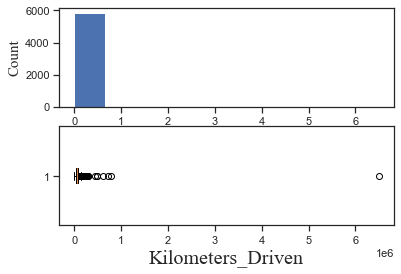

In [18]:
plt.subplot(2,1,1)
plt.hist(price_data['Kilometers_Driven'])
plt.ylabel('Count', fontsize = 15, fontdict = {'fontname' : 'Times New Roman'})

plt.subplot(2,1,2)
plt.boxplot(price_data['Kilometers_Driven'], vert = False)
plt.xlabel('Kilometers_Driven', fontsize = 20, fontdict = {'fontname' : 'Times New Roman'})
plt.show()

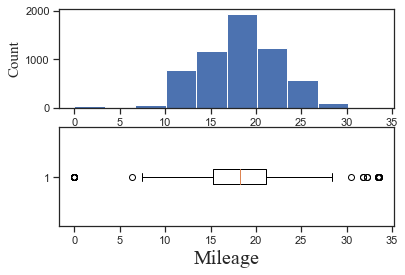

In [19]:
plt.subplot(2,1,1)
plt.hist(price_data['Mileage'])
plt.ylabel('Count', fontsize = 15, fontdict = {'fontname' : 'Times New Roman'})

plt.subplot(2,1,2)
plt.boxplot(price_data['Mileage'], vert = False)
plt.xlabel('Mileage', fontsize = 20, fontdict = {'fontname' : 'Times New Roman'})
plt.show()

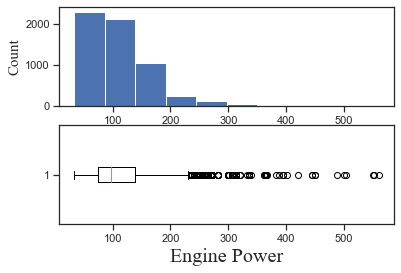

In [20]:
plt.subplot(2,1,1)
plt.hist(price_data['Power'])
plt.ylabel('Count', fontsize = 15, fontdict = {'fontname' : 'Times New Roman'})

plt.subplot(2,1,2)
plt.boxplot(price_data['Power'], vert = False)
plt.xlabel('Engine Power', fontsize = 20, fontdict = {'fontname' : 'Times New Roman'})
plt.show()

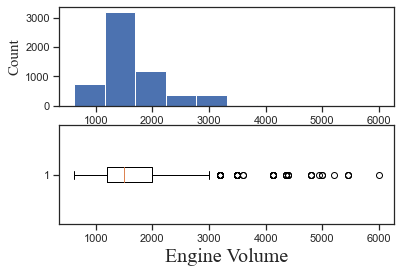

In [21]:
plt.subplot(2,1,1)
plt.hist(price_data['Engine'])
plt.ylabel('Count', fontsize = 15, fontdict = {'fontname' : 'Times New Roman'})

plt.subplot(2,1,2)
plt.boxplot(price_data['Engine'], vert = False)
plt.xlabel('Engine Volume', fontsize = 20, fontdict = {'fontname' : 'Times New Roman'})
plt.show()

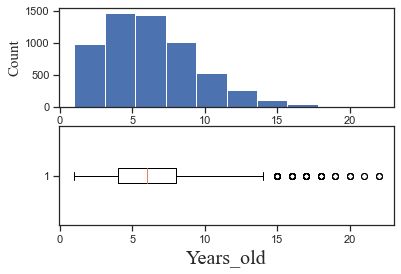

In [22]:
plt.subplot(2,1,1)
plt.hist(price_data['Years_old'])
plt.ylabel('Count', fontsize = 15, fontdict = {'fontname' : 'Times New Roman'})

plt.subplot(2,1,2)
plt.boxplot(price_data['Years_old'], vert = False)
plt.xlabel('Years_old', fontsize = 20, fontdict = {'fontname' : 'Times New Roman'})
plt.show()

# Data cleansing

In [23]:
outlier_index = price_data[(price_data['Kilometers_Driven'] > 250000) | 
                           (price_data['Power'] >= 300 ) |
                           (price_data['Engine'] >= 4000) |
                           (price_data['Mileage'] == 0)].index
print(len(outlier_index))

100


In [24]:
price_data.loc[outlier_index]

,Model,Location,Years_old,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
14,Land,Pune,8,85000,Diesel,Automatic,Second,0.00,2179.0,115.00,5.0,1750000.0
29,Toyota,Mumbai,13,262000,Diesel,Manual,Fourth & Above,12.80,2494.0,102.00,7.0,400000.0
67,Mercedes-Benz,Coimbatore,1,15369,Diesel,Automatic,First,0.00,1950.0,194.00,5.0,3567000.0
70,Porsche,Mumbai,12,73000,Petrol,Automatic,First,8.50,4806.0,500.00,5.0,1450000.0
134,Mercedes-Benz,Kolkata,3,13372,Petrol,Automatic,First,19.00,2996.0,362.07,2.0,5400000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
5832,Mercedes-Benz,Ahmedabad,1,4000,Diesel,Automatic,First,0.00,1950.0,194.00,5.0,3500000.0
5875,Jaguar,Hyderabad,5,8000,Petrol,Automatic,First,12.50,5000.0,488.10,2.0,10000000.0
5928,Hyundai,Mumbai,12,65000,Petrol,Manual,Second,0.00,1086.0,62.00,5.0,139000.0
5964,Porsche,Hyderabad,7,40000,Diesel,Automatic,Second,17.85,2967.0,300.00,4.0,4500000.0


In [25]:
price_data.drop(outlier_index, inplace = True)
price_data.reset_index(drop = True)
print(price_data.shape)

(5772, 12)


In [26]:
price_data.to_csv(r'C:\Users\lenovo\Desktop\My projects\Datasets\Used car price prediction\data_cleansed.csv', index = False)

# Data visualization

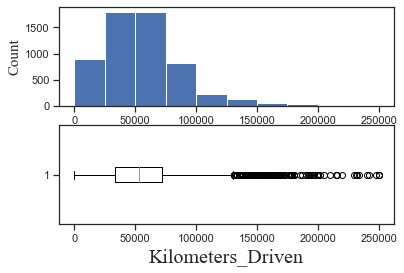

In [27]:
plt.subplot(2,1,1)
plt.hist(price_data['Kilometers_Driven'])
plt.ylabel('Count', fontsize = 15, fontdict = {'fontname' : 'Times New Roman'})

plt.subplot(2,1,2)
plt.boxplot(price_data['Kilometers_Driven'], vert = False)
plt.xlabel('Kilometers_Driven', fontsize = 20, fontdict = {'fontname' : 'Times New Roman'})
plt.show()

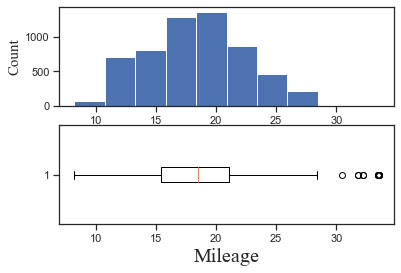

In [28]:
plt.subplot(2,1,1)
plt.hist(price_data['Mileage'])
plt.ylabel('Count', fontsize = 15, fontdict = {'fontname' : 'Times New Roman'})

plt.subplot(2,1,2)
plt.boxplot(price_data['Mileage'], vert = False)
plt.xlabel('Mileage', fontsize = 20, fontdict = {'fontname' : 'Times New Roman'})
plt.show()

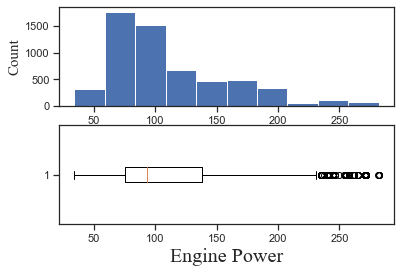

In [29]:
plt.subplot(2,1,1)
plt.hist(price_data['Power'])
plt.ylabel('Count', fontsize = 15, fontdict = {'fontname' : 'Times New Roman'})

plt.subplot(2,1,2)
plt.boxplot(price_data['Power'], vert = False)
plt.xlabel('Engine Power', fontsize = 20, fontdict = {'fontname' : 'Times New Roman'})
plt.show()

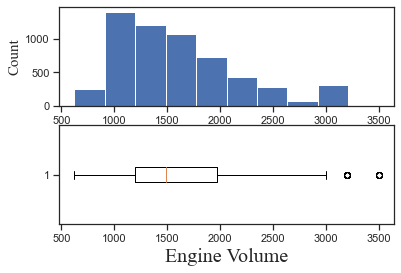

In [30]:
plt.subplot(2,1,1)
plt.hist(price_data['Engine'])
plt.ylabel('Count', fontsize = 15, fontdict = {'fontname' : 'Times New Roman'})

plt.subplot(2,1,2)
plt.boxplot(price_data['Engine'], vert = False)
plt.xlabel('Engine Volume', fontsize = 20, fontdict = {'fontname' : 'Times New Roman'})
plt.show()

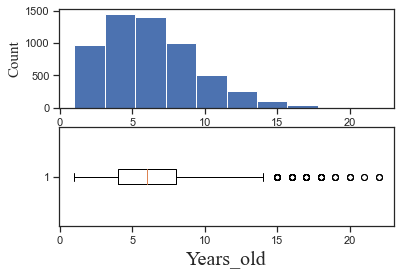

In [31]:
plt.subplot(2,1,1)
plt.hist(price_data['Years_old'])
plt.ylabel('Count', fontsize = 15, fontdict = {'fontname' : 'Times New Roman'})

plt.subplot(2,1,2)
plt.boxplot(price_data['Years_old'], vert = False)
plt.xlabel('Years_old', fontsize = 20, fontdict = {'fontname' : 'Times New Roman'})
plt.show()

# Advanced Data visualization

In [32]:
import matplotlib.image as mpimg

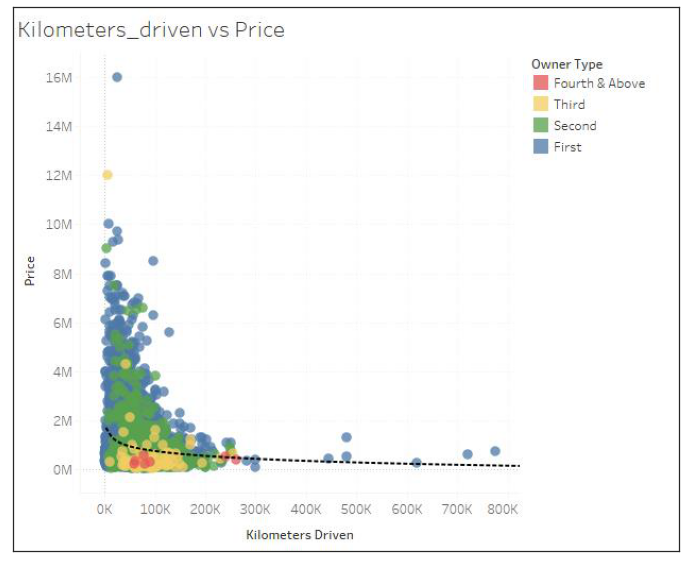

In [33]:
plt.figure(figsize = (30,10))
img = mpimg.imread(r'C:\Users\lenovo\Desktop\My projects\Datasets\Used car price prediction\Kilometers_driven vs Price.jpg')
imgplot = plt.imshow(img)
plt.xticks([])
plt.yticks([])
plt.show()


P-value:
< 0.0001
Equation:
Price = -286961*ln(Kilometers Driven) + 4.03827e+06


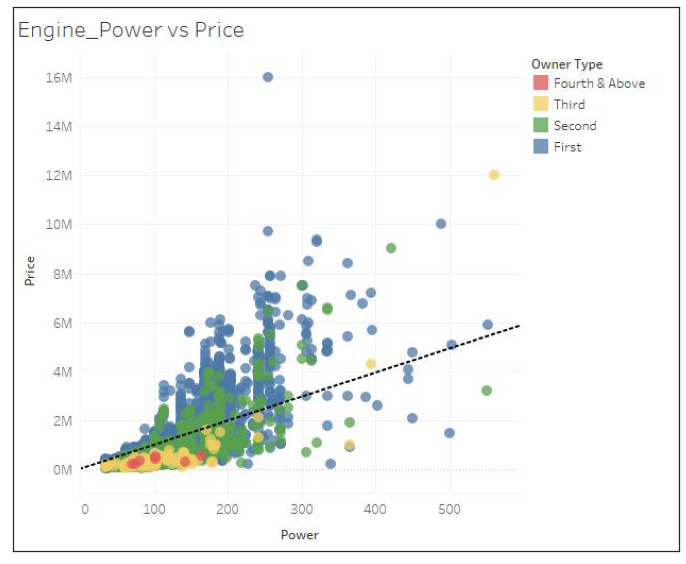

In [34]:
plt.figure(figsize = (30,10))
img = mpimg.imread(r'C:\Users\lenovo\Desktop\My projects\Datasets\Used car price prediction\Engine_Power vs Price.jpg')
imgplot = plt.imshow(img)
plt.xticks([])
plt.yticks([])
plt.show()

P-value:
< 0.0001
Equation:
ln(Price) = 1.63839*ln(Power) + 5.75821

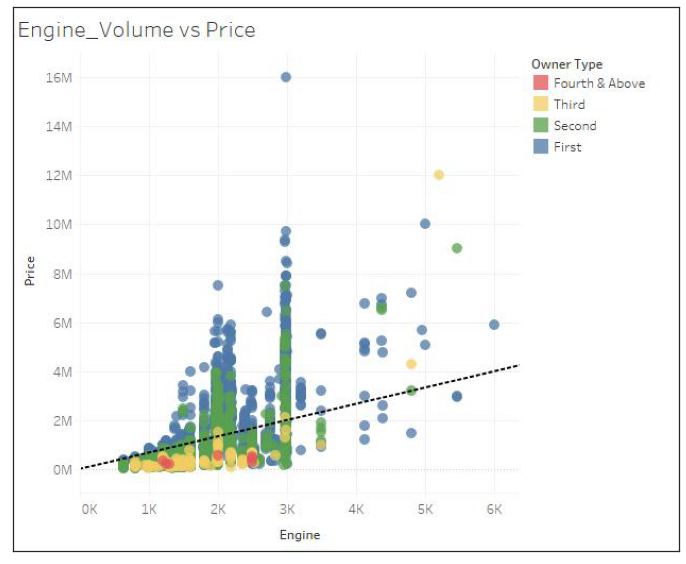

In [35]:
plt.figure(figsize = (30,10))
img = mpimg.imread(r'C:\Users\lenovo\Desktop\My projects\Datasets\Used car price prediction\Engine_Volume vs Price.jpg')
imgplot = plt.imshow(img)
plt.xticks([])
plt.yticks([])
plt.show()


P-value:
< 0.0001
Equation:
ln(Price) = 1.78793*ln(Engine) + 0.24485



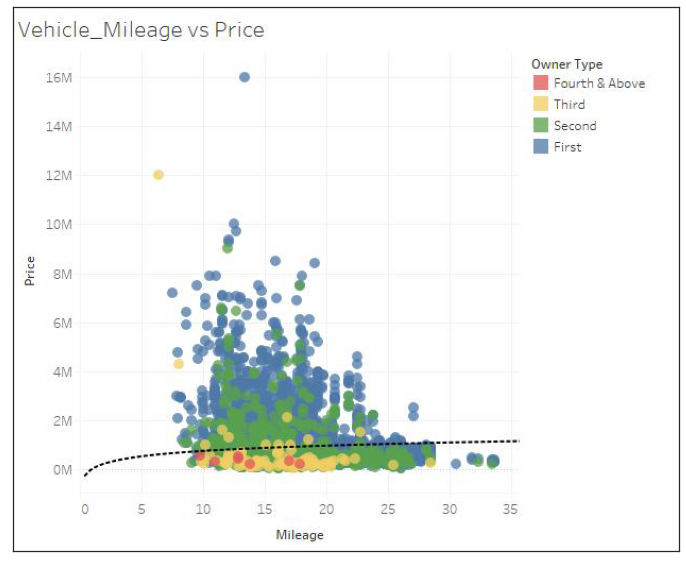

In [36]:
plt.figure(figsize = (30,10))
img = mpimg.imread(r'C:\Users\lenovo\Desktop\My projects\Datasets\Used car price prediction\Vehicle_Mileage vs Price.jpg')
imgplot = plt.imshow(img)
plt.xticks([])
plt.yticks([])
plt.show()


P-value:
< 0.0001
Equation:
Price = 317236*ln(Mileage)


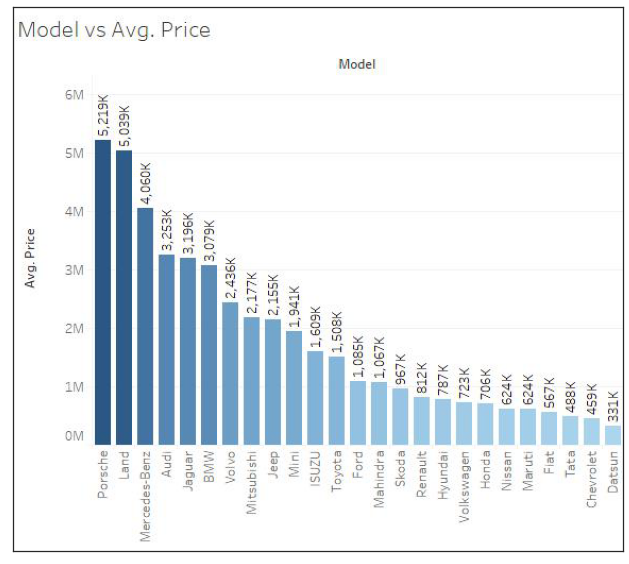

In [37]:
plt.figure(figsize = (30,10))
img = mpimg.imread(r'C:\Users\lenovo\Desktop\My projects\Datasets\Used car price prediction\Model vs Avg. Price.jpg')
imgplot = plt.imshow(img)
plt.xticks([])
plt.yticks([])
plt.show()

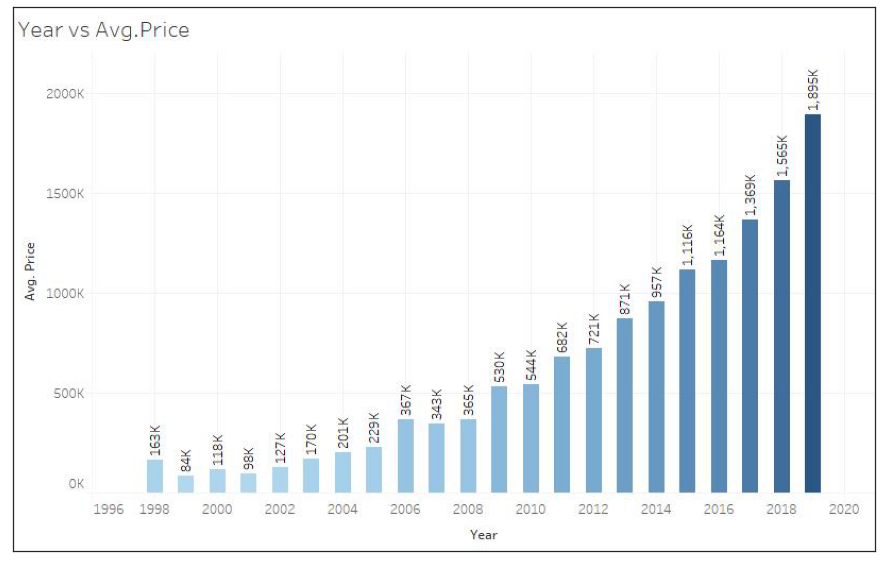

In [38]:
plt.figure(figsize = (30,10))
img = mpimg.imread(r'C:\Users\lenovo\Desktop\My projects\Datasets\Used car price prediction\Year vs Avg.Price.jpg')
imgplot = plt.imshow(img)
plt.xticks([])
plt.yticks([])
plt.show()

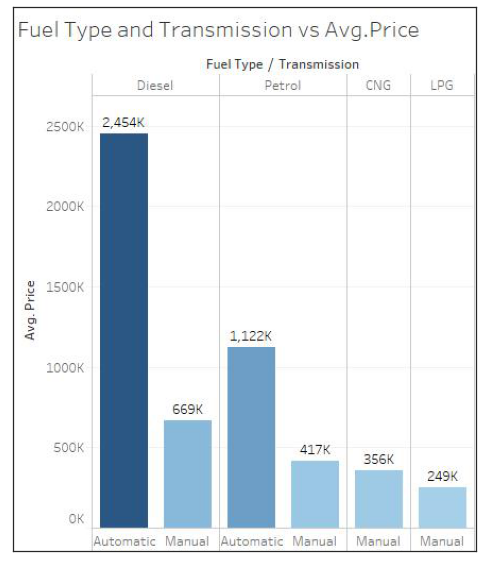

In [39]:
plt.figure(figsize = (30,10))
img = mpimg.imread(r'C:\Users\lenovo\Desktop\My projects\Datasets\Used car price prediction\Fuel Type and Transmission vs Avg.Price.jpg')
imgplot = plt.imshow(img)
plt.xticks([])
plt.yticks([])
plt.show()

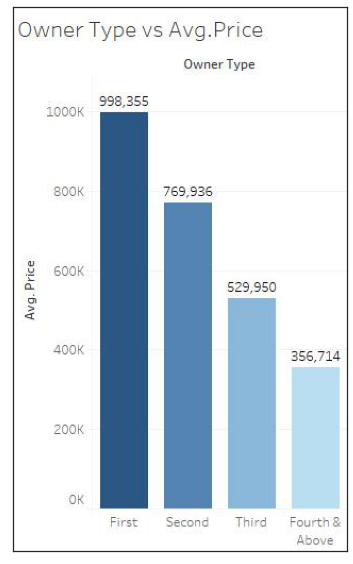

In [40]:
plt.figure(figsize = (30,10))
img = mpimg.imread(r'C:\Users\lenovo\Desktop\My projects\Datasets\Used car price prediction\Owner Type vs Avg.Price.jpg')
imgplot = plt.imshow(img)
plt.xticks([])
plt.yticks([])
plt.show()

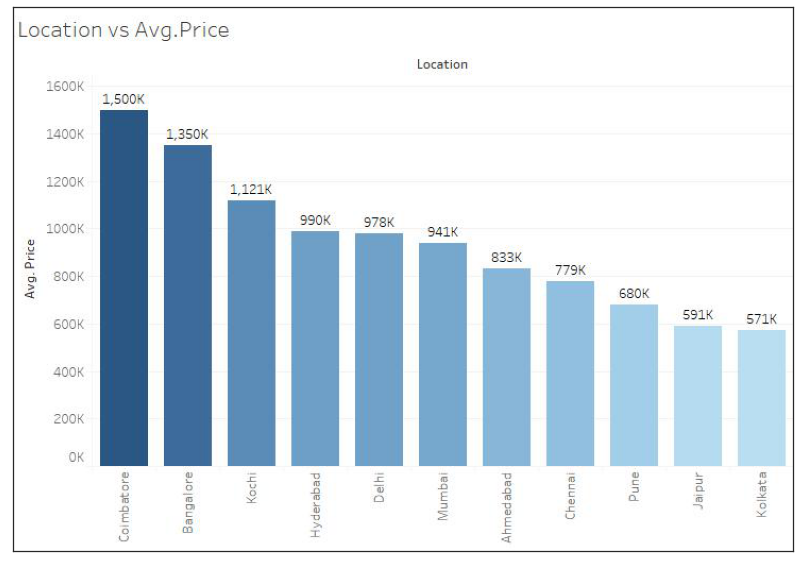

In [41]:
plt.figure(figsize = (30,10))
img = mpimg.imread(r'C:\Users\lenovo\Desktop\My projects\Datasets\Used car price prediction\Location vs Avg.Price.jpg')
imgplot = plt.imshow(img)
plt.xticks([])
plt.yticks([])
plt.show()

# Checking assumptions for linear regression

## Checking  Linearity

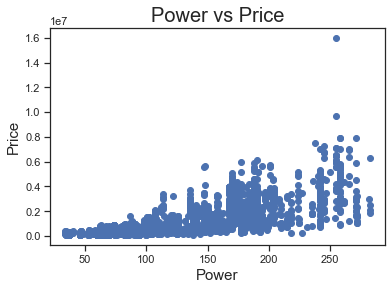

In [42]:
plt.scatter(price_data['Power'], price_data['Price'])
plt.xlabel('Power', fontsize = 15)
plt.ylabel('Price', fontsize = 15)
plt.title('Power vs Price', fontsize = 20)
plt.show()

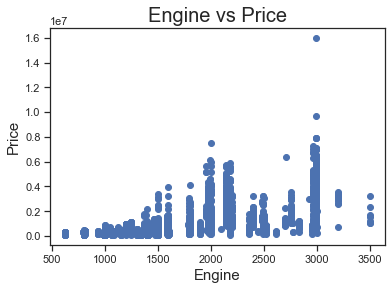

In [43]:
plt.scatter(price_data['Engine'], price_data['Price'])
plt.xlabel('Engine', fontsize = 15)
plt.ylabel('Price', fontsize = 15)
plt.title('Engine vs Price', fontsize = 20)
plt.show()

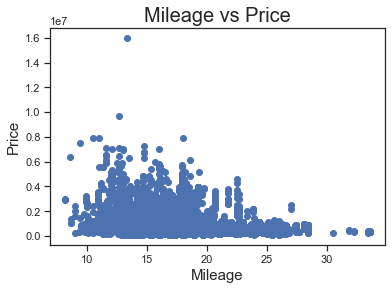

In [44]:
plt.scatter(price_data['Mileage'], price_data['Price'])
plt.xlabel('Mileage', fontsize = 15)
plt.ylabel('Price', fontsize = 15)
plt.title('Mileage vs Price', fontsize = 20)
plt.show()

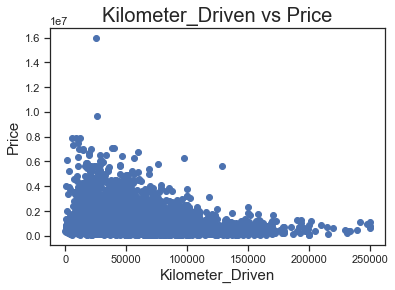

In [45]:
plt.scatter(price_data['Kilometers_Driven'], price_data['Price'])
plt.xlabel('Kilometer_Driven', fontsize = 15)
plt.ylabel('Price', fontsize = 15)
plt.title('Kilometer_Driven vs Price', fontsize = 20)
plt.show()

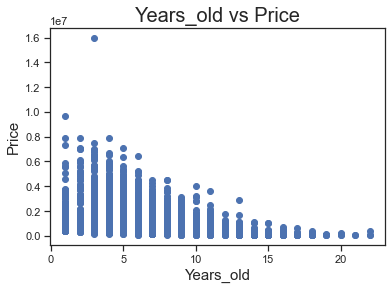

In [46]:
plt.scatter(price_data['Years_old'], price_data['Price'])
plt.xlabel('Years_old', fontsize = 15)
plt.ylabel('Price', fontsize = 15)
plt.title('Years_old vs Price', fontsize = 20)
plt.show()

## Checking Multi-collinearity

In [47]:
price_data.columns

Index(['Model', 'Location', 'Years_old', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'Price'],
      dtype='object')

In [48]:
correlation_value = price_data.drop(['Price'], axis = 1).corr()

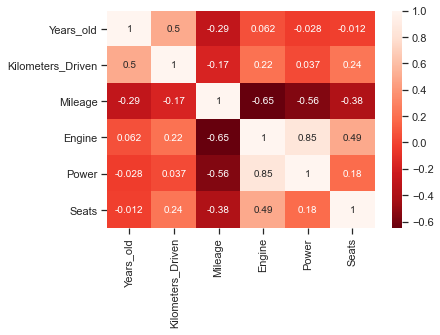

In [49]:
sns.heatmap(correlation_value, cmap="Reds_r",annot=True)
plt.show()

As expected, correlation at the diagonal is full of ‘1’s. It seems there is no too high correlation between features.

# Data engineering

In [50]:
num = price_data.groupby(price_data['Model']).mean().sort_values('Price', ascending = True).round()
num['Model_numeric'] = [i for i in range(1, len(num)+1)]
model_numeric = dict(num['Model_numeric'])
price_data['Model'] = price_data['Model'].map(model_numeric)

In [51]:
num = price_data.groupby(price_data['Location']).mean().sort_values('Price', ascending = True).round()
num['Location_numeric'] = [i for i in range(1, len(num)+1)]
location_numeric = dict(num['Location_numeric'])
price_data['Location'] = price_data['Location'].map(location_numeric)

In [52]:
num = price_data.groupby(price_data['Fuel_Type']).mean().sort_values('Price', ascending = True).round()
num['Fuel_Type_numeric'] = [i for i in range(1, len(num)+1)]
fuel_type_numeric = dict(num['Fuel_Type_numeric'])
price_data['Fuel_Type'] = price_data['Fuel_Type'].map(fuel_type_numeric)

In [53]:
num = price_data.groupby(price_data['Transmission']).mean().sort_values('Price', ascending = True).round()
num['Transmission_numeric'] = [i for i in range(1, len(num)+1)]
transmission_numeric = dict(num['Transmission_numeric'])
price_data['Transmission'] = price_data['Transmission'].map(transmission_numeric)

In [54]:
num = price_data.groupby(price_data['Owner_Type']).mean().sort_values('Price', ascending = True).round()
num['Owner_Type_numeric'] = [i for i in range(1, len(num)+1)]
owner_type_numeric = dict(num['Owner_Type_numeric'])
price_data['Owner_Type'] = price_data['Owner_Type'].map(owner_type_numeric)

In [109]:
price_data['Log_Price'] = np.log(price_data['Price'])
price_data['Kilometers_Driven'] = np.log(price_data['Kilometers_Driven'])
price_data

,Model,Location,Years_old,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Log_Price,Log_Kilometers_Driven
0,6,6,10,11.184421,2,1,4,26.60,998.0,58.16,5.0,175000.0,12.072541,11.184421
1,10,3,5,10.621327,4,1,4,19.67,1582.0,126.20,5.0,1250000.0,14.038654,10.621327
2,9,4,9,10.736397,3,1,4,18.20,1199.0,88.70,5.0,450000.0,13.017003,10.736397
3,6,4,8,11.373663,4,1,4,20.77,1248.0,88.76,7.0,600000.0,13.304685,11.373663
4,22,11,7,10.613246,4,2,3,15.20,1968.0,140.80,5.0,1774000.0,14.388747,10.613246
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5970,6,7,6,10.217020,4,1,4,28.40,1248.0,74.00,5.0,475000.0,13.071070,10.217020
5971,10,2,5,11.512925,4,1,4,24.40,1120.0,71.00,5.0,400000.0,12.899220,11.512925
5972,14,2,8,10.915088,4,1,3,14.00,2498.0,112.00,8.0,290000.0,12.577636,10.915088
5973,6,1,7,10.736397,3,1,4,18.90,998.0,67.10,5.0,265000.0,12.487485,10.736397


In [110]:
price_data_final = price_data[['Model', 'Location', 'Years_old', 'Fuel_Type', 'Transmission', 'Owner_Type', \
       'Seats', 'Kilometers_Driven', 'Mileage', 'Engine', \
       'Power', 'Log_Price']]
price_data_final

,Model,Location,Years_old,Fuel_Type,Transmission,Owner_Type,Seats,Kilometers_Driven,Mileage,Engine,Power,Log_Price
0,6,6,10,2,1,4,5.0,11.184421,26.60,998.0,58.16,12.072541
1,10,3,5,4,1,4,5.0,10.621327,19.67,1582.0,126.20,14.038654
2,9,4,9,3,1,4,5.0,10.736397,18.20,1199.0,88.70,13.017003
3,6,4,8,4,1,4,7.0,11.373663,20.77,1248.0,88.76,13.304685
4,22,11,7,4,2,3,5.0,10.613246,15.20,1968.0,140.80,14.388747
...,...,...,...,...,...,...,...,...,...,...,...,...
5970,6,7,6,4,1,4,5.0,10.217020,28.40,1248.0,74.00,13.071070
5971,10,2,5,4,1,4,5.0,11.512925,24.40,1120.0,71.00,12.899220
5972,14,2,8,4,1,3,8.0,10.915088,14.00,2498.0,112.00,12.577636
5973,6,1,7,3,1,4,5.0,10.736397,18.90,998.0,67.10,12.487485


## Data visualization

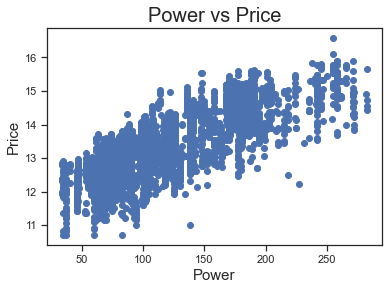

In [111]:
plt.scatter(price_data_final['Power'], price_data_final['Log_Price'])
plt.xlabel('Power', fontsize = 15)
plt.ylabel('Price', fontsize = 15)
plt.title('Power vs Price', fontsize = 20)
plt.show()

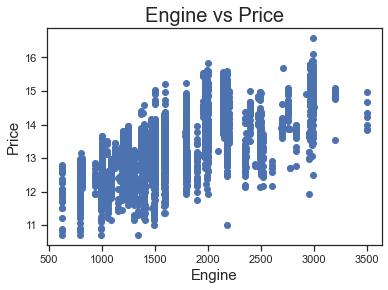

In [112]:
plt.scatter(price_data_final['Engine'], price_data_final['Log_Price'])
plt.xlabel('Engine', fontsize = 15)
plt.ylabel('Price', fontsize = 15)
plt.title('Engine vs Price', fontsize = 20)
plt.show()

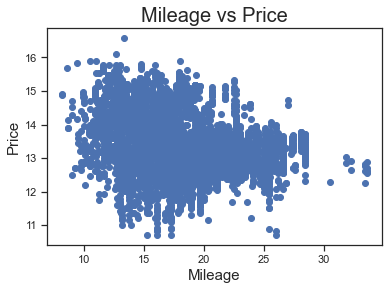

In [113]:
plt.scatter(price_data_final['Mileage'], price_data_final['Log_Price'])
plt.xlabel('Mileage', fontsize = 15)
plt.ylabel('Price', fontsize = 15)
plt.title('Mileage vs Price', fontsize = 20)
plt.show()

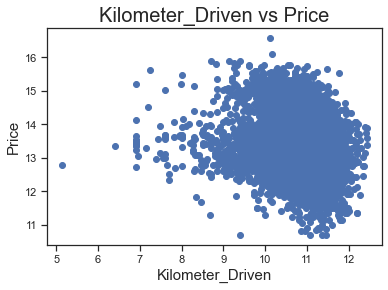

In [114]:
plt.scatter(price_data_final['Kilometers_Driven'], price_data_final['Log_Price'])
plt.xlabel('Kilometer_Driven', fontsize = 15)
plt.ylabel('Price', fontsize = 15)
plt.title('Kilometer_Driven vs Price', fontsize = 20)
plt.show()

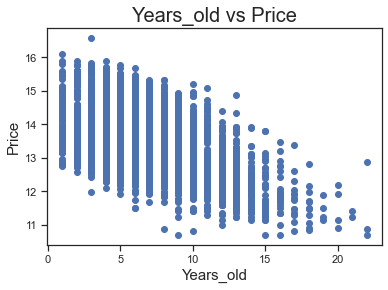

In [115]:
plt.scatter(price_data_final['Years_old'], price_data_final['Log_Price'])
plt.xlabel('Years_old', fontsize = 15)
plt.ylabel('Price', fontsize = 15)
plt.title('Years_old vs Price', fontsize = 20)
plt.show()

# Feature Engineering

In [116]:
price_data_final.columns

Index(['Model', 'Location', 'Years_old', 'Fuel_Type', 'Transmission',
       'Owner_Type', 'Seats', 'Kilometers_Driven', 'Mileage', 'Engine',
       'Power', 'Log_Price'],
      dtype='object')

In [117]:
features = price_data_final.drop(['Log_Price'], axis = 1)
outcome = price_data_final['Log_Price']
features.shape, outcome.shape

((5772, 11), (5772,))

In [118]:
from sklearn.feature_selection import f_regression
f_reg = f_regression(features, outcome)

In [119]:
reg_summary = pd.DataFrame()
reg_summary['Features'] = features.columns
reg_summary['Co-efficient'] = f_reg[0]
reg_summary['p-value'] = f_reg[1].round(3)
reg_summary.sort_values('Co-efficient', ascending = False).reset_index(drop = True)

,Features,Co-efficient,p-value
0,Power,9213.603778,0.0
1,Model,6529.643986,0.0
2,Engine,4937.711151,0.0
3,Transmission,3326.557510,0.0
4,Years_old,1951.779245,0.0
5,Fuel_Type,1398.922943,0.0
6,Location,644.282426,0.0
7,Mileage,552.354536,0.0
8,Seats,263.010557,0.0
9,Owner_Type,236.026450,0.0


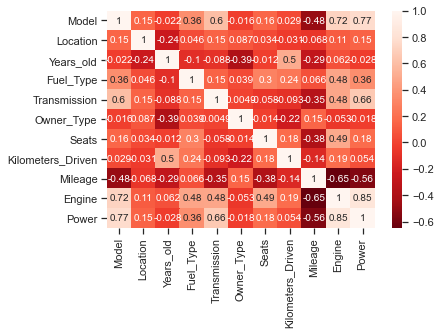

In [120]:
correlation_value = price_data_final.drop(['Log_Price'], axis = 1).corr()
sns.heatmap(correlation_value, cmap="Reds_r",annot=True)
plt.show()

In [121]:
price_data_final.drop(['Engine'], axis = 1, inplace = True)

Eventhough we got p-value for certain features greater than 0.005, it is mandotory not to drop these features as they are just extracted from the parent features, whose children feature have p-value less than 0.005.

# Train and Test split

In [122]:
from sklearn.model_selection import train_test_split

In [192]:
x_train, x_test, y_train, y_test = train_test_split(features, outcome, test_size = 0.1, random_state = 42)
x_train = x_train.reset_index(drop = True)
x_test = x_test.reset_index(drop = True)
y_train = y_train.reset_index(drop = True)
y_test = y_test.reset_index(drop = True)

In [193]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape,

((5194, 11), (578, 11), (5194,), (578,))

# Polynomial Regresssion

In [194]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [195]:
poly_reg = PolynomialFeatures(degree = 2)
x_poly_train = poly_reg.fit_transform(x_train)
poly_line = LinearRegression(normalize = True)
poly_line.fit(x_poly_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [196]:
y_hat_train = poly_line.predict(x_poly_train)
prediction_train = pd.DataFrame()
prediction_train['Actual'] = np.exp(y_train)
prediction_train['Predicted'] = np.exp(y_hat_train).round()
prediction_train['Error'] = prediction_train['Actual'] - prediction_train['Predicted']
prediction_train

,Actual,Predicted,Error
0,225000.0,213503.0,11497.0
1,685000.0,724664.0,-39664.0
2,235000.0,279942.0,-44942.0
3,799000.0,575522.0,223478.0
4,389000.0,548096.0,-159096.0
...,...,...,...
5189,545000.0,501971.0,43029.0
5190,876000.0,824529.0,51471.0
5191,500000.0,491163.0,8837.0
5192,1350000.0,1461332.0,-111332.0


In [197]:
from sklearn.metrics import r2_score
print("R2 score for test dataset is ", r2_score(prediction_train['Actual'], prediction_train['Predicted']).round(4) * 100, '%')

R2 score for test dataset is  90.42999999999999 %


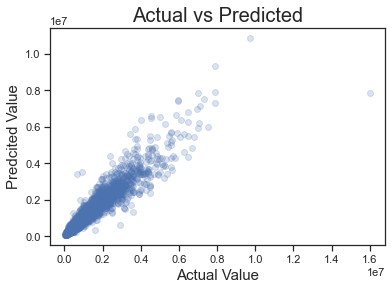

In [198]:
plt.scatter(prediction_train['Actual'], prediction_train['Predicted'], alpha = 0.2)
plt.xlabel('Actual Value', fontsize = 15)
plt.ylabel('Predcited Value', fontsize = 15)
plt.title('Actual vs Predicted', fontsize = 20)
plt.show()

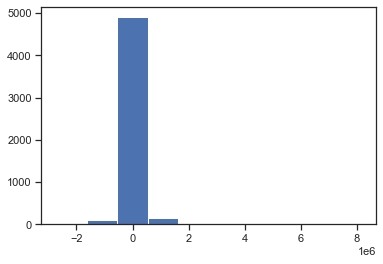

In [199]:
plt.hist(prediction_train['Error'])
plt.show()

In [200]:
x_poly_test = poly_reg.fit_transform(x_test)
y_hat_test = poly_line.predict(x_poly_test)
prediction_test = pd.DataFrame()
prediction_test['Actual'] = np.exp(y_test)
prediction_test['Predicted'] = np.exp(y_hat_test).round()
prediction_test['Error'] = prediction_test['Actual'] - prediction_test['Predicted']
prediction_test.sort_values('Predicted')

,Actual,Predicted,Error
89,45000.0,45309.0,-309.0
547,51000.0,47420.0,3580.0
346,80000.0,94819.0,-14819.0
59,140000.0,101985.0,38015.0
553,125000.0,103948.0,21052.0
...,...,...,...
361,3615000.0,5288923.0,-1673923.0
126,4822000.0,5381881.0,-559881.0
136,7066000.0,5417115.0,1648885.0
535,6400000.0,5853051.0,546949.0


In [201]:
print("R2 score for test dataset is ", r2_score(prediction_test['Actual'], prediction_test['Predicted']).round(4) * 100, '%')

R2 score for test dataset is  91.7 %


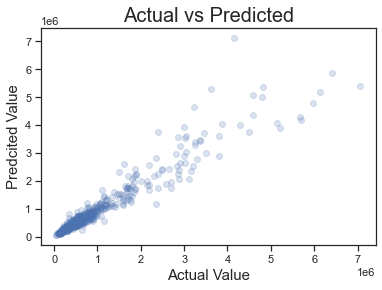

In [202]:
plt.scatter(prediction_test['Actual'], prediction_test['Predicted'], alpha = 0.2)
plt.xlabel('Actual Value', fontsize = 15)
plt.ylabel('Predcited Value', fontsize = 15)
plt.title('Actual vs Predicted', fontsize = 20)
plt.show()

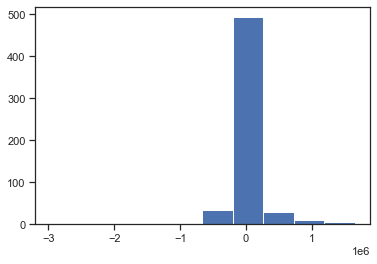

In [203]:
plt.hist(prediction_test['Error'])
plt.show()